# Traveling Ethiopia Search Problem

**By: Tigist Wondimneh
ID: UGR/5506/17**

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

In [89]:
def visualize_path(graph, path):
        G = nx.Graph()

        for city, neighbors in graph.items():
            for neighbor in neighbors:
                G.add_edge(city, neighbor)

        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="orange")

        plt.title("Path Visualization")
        plt.show()


## Question 1: BFS and DFS Implementation

In this section, I have:

1. Converted Figure 1 (state space graph) into a manageable data structure.
2. Implemented Breadth-First Search (BFS) and Depth-First Search (DFS).


In [90]:
from collections import deque

class EthiopiaGraph:
    def __init__(self):
        self.graph = {
            "Addis Ababa": ["Ambo", "Adama", "Debre Birhan"],
            "Ambo": ["Addis Ababa", "Nekemte", "Wolkite"],
            "Adama": ["Addis Ababa", "Batu", "Assella", "Matahara"],
            "Debre Birhan": ["Addis Ababa", "Debre Sina"],

            "Nekemte": ["Ambo", "Gimbi", "Bedelle"],
            "Gimbi": ["Nekemte", "Dembi Dollo"],
            "Dembi Dollo": ["Gimbi", "Assosa", "Gambella"],

            "Gore": ["Bedelle", "Tepi", "Gambella"],
            "Tepi": ["Gore", "Mezan Teferi", "Bonga"],
            "Mezan Teferi": ["Tepi", "Bonga"],

            "Basketo": [ "Bench Maji", "Arba Minch"],
            "Dawro": ["Wolaita Sodo", "Bonga"],
            "Konso": ["Yabello", "Arba Minch"],
            "Arba Minch": ["Konso", "Wolaita Sodo", "Basketo"],

            "Bonga": ["Mezan Teferi", "Jimma", "Dawro", "Tepi"],
            "Jimma": ["Bonga", "Wolkite", "Bedelle"],
            "Wolaita Sodo": ["Hossana", "Dawro", "Arba Minch"],
            "Hossana": ["Wolaita Sodo", "Shashemene", "Worabe"],

            "Shashemene": ["Hossana", "Hawassa", "Dodolla", "Batu"],
            "Batu": ["Adama", "Shashemene", "Buta Jira"],
            "Buta Jira": ["Batu", "Worabe"],
            "Worabe": ["Buta Jira", "Hossana", "Wolkite"],
            "Wolkite": ["Worabe", "Ambo", "Jimma"],

            "Assella": ["Adama", "Asasa"],
            "Hawassa": ["Shashemene", "Dilla"],
            "Dilla": ["Hawassa", "Bule Hora"],
            "Bule Hora": ["Dilla", "Yabello"],
            "Yabello": ["Bule Hora", "Moyale", "Konso"],

            "Moyale": ["Yabello", "Nairobi"],
            "Awash": ["Matahara", "Chiro", "Gabi Rasu"],
            "Chiro": ["Awash", "Dire Dawa"],

            "Dire Dawa": ["Chiro", "Harar"],
            "Harar": ["Dire Dawa", "Babile"],
            "Babile": ["Harar", "Jijiga"],
            "Jijiga": ["Babile", "Dega Habur"],

            "Dega Habur": ["Jijiga", "Kebri Dehar"],
            "Kebri Dehar": ["Dega Habur", "Gode", "Werder"],
            "Gode": ["Kebri Dehar", "Dollo", "Mokadisho", "Sof Oumer"],

            "Dollo": ["Gode"],
            "Liben": ["Bale"],
            "Bale": ["Liben", "Dodolla", "Goba", "Sof Oumer"],
            "Dodolla": ["Bale", "Shashemene", "Assasa"],
            "Assasa": ["Dodolla", "Assella"],
            "Goba": ["Sof Oumer", "Bale"],
            "Sof Oumer": ["Goba", "Bale","Gode"],

            "Dodola": ["Bale", "Assasa", "Shashemene"],
            "Matahara": ["Adama", "Awash"],
            "Gabi Rasu": ["Awash", "Samara"],
            "Samara": ["Gabi Rasu", "Alamata", "Fanti Rasu", "Woldia"],
            "Alamata": ["Samara", "Mekelle","Sekota", "Woldia"],
            "Fanti Rasu": ["Samara", "Kilbet Rasu"],
            "Kilbet Rasu": ["Fanti Rasu"],

            "Sekota": ["Alamata", "Mekelle", "Lallibela"],
            "Mekelle":["Sekota", "Alamata", "Adwa", "Adigrat"],
            "Adwa": ["Mekelle", "Axum", "Adigrat"],
            "Axum": ["Adwa", "Shire", "Asmera"],
            "Shire": ["Axum", "Debarke", "Humera"],
            "Debarke": ["Shire", "Gondar", "Humera"],
            "Gondar": ["Debarke", "Azezo", "Metema", "Humera"],
            "Azezo": ["Gondar", "Bahir Dar", "Metema"],
            "Bahir Dar": ["Azezo", "Debre Tabor", "Metekel", "Finote Selam", "Injibara"],
            "Debre Tabor": ["Bahir Dar", "Lallibela"],
            "Lallibela": ["Debre Tabor", "Sekota", "Woldia"],
            "Finote Selam": ["Bahir Dar", "Injibara", "Debre Markos"],
            "Injibara": ["Finote Selam", "Bahir Dar"],
            "Metema": ["Azezo", "Gondar", "Kartum"],

            "Kartum": ["Metema", "Humera"],
            "Humera": ["Kartum", "Gondar", "Shire"],
            "Adigrat": ["Mekelle", "Adwa", "Asmera"],

            "Asmera": ["Adigrat", "Axum"],

            "Werder": ["Kebri Dehar"],
            "Metekel": ["Bahir Dar"],
            "Bench Maji": ["Basketo", "Juba"],
            "Gambella": ["Dembi Dollo", "Gore"],
            "Bedelle": ["Nekemte", "Jimma", "Gore"],

            "Assosa": ["Dembi Dollo"],
            "Debre Markos": ["Debre Sina", "Finote Selam"],
            "Woldia": ["Lallibela", "Alamata", "Samara", "Dessie"],
            "Dessie": ["Woldia", "Kemise"],
            "Kemise": ["Dessie", "Debre Sina"],

            "Mokadihso": ["Gode"],
            "Nairobi": ["Moyale"],
            "Juba": ["Bench Maji"],
        }

    def get_neighbors(self, city):
        return self.graph.get(city, [])



### BFS and DFS Implementation


In [91]:

class EthiopiaSearch:
    def __init__(self, graph):
        self.graph = graph

    def bfs(self, start, goal):
        queue = deque([(start, [start])])
        visited = set()

        while queue:
            city, path = queue.popleft()
            if city in visited:
                continue
            visited.add(city)
            if city == goal:
                return path
            for neighbor in self.graph.get_neighbors(city):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
        return None

    def dfs(self, start, goal):

        stack = [(start, [start])]
        visited = set()

        while stack:
            city, path = stack.pop()
            if city in visited:
                continue
            visited.add(city)
            if city == goal:
                return path
            for neighbor in self.graph.get_neighbors(city):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
        return None

    def find_path(self, start, goal, strategy="bfs"):
        if strategy == "bfs":
            return self.bfs(start, goal)
        elif strategy == "dfs":
            return self.dfs(start, goal)
        else:
            raise ValueError("Invalid search strategy. Use 'bfs' or 'dfs'.")


### Running BFS and DFS

Let's find the paths from "Addis Ababa" to "Tepi" using both BFS and DFS.


In [92]:
ethiopia_map = EthiopiaGraph()
ethiopia_search = EthiopiaSearch(ethiopia_map)

bfs_path = ethiopia_search.find_path("Addis Ababa", "Goba", strategy="bfs")
print("BFS Path:", bfs_path)

dfs_path = ethiopia_search.find_path("Addis Ababa", "Goba", strategy="dfs")
print("DFS Path:", dfs_path)

BFS Path: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Dodolla', 'Bale', 'Goba']
DFS Path: ['Addis Ababa', 'Adama', 'Matahara', 'Awash', 'Chiro', 'Dire Dawa', 'Harar', 'Babile', 'Jijiga', 'Dega Habur', 'Kebri Dehar', 'Gode', 'Sof Oumer', 'Bale', 'Goba']


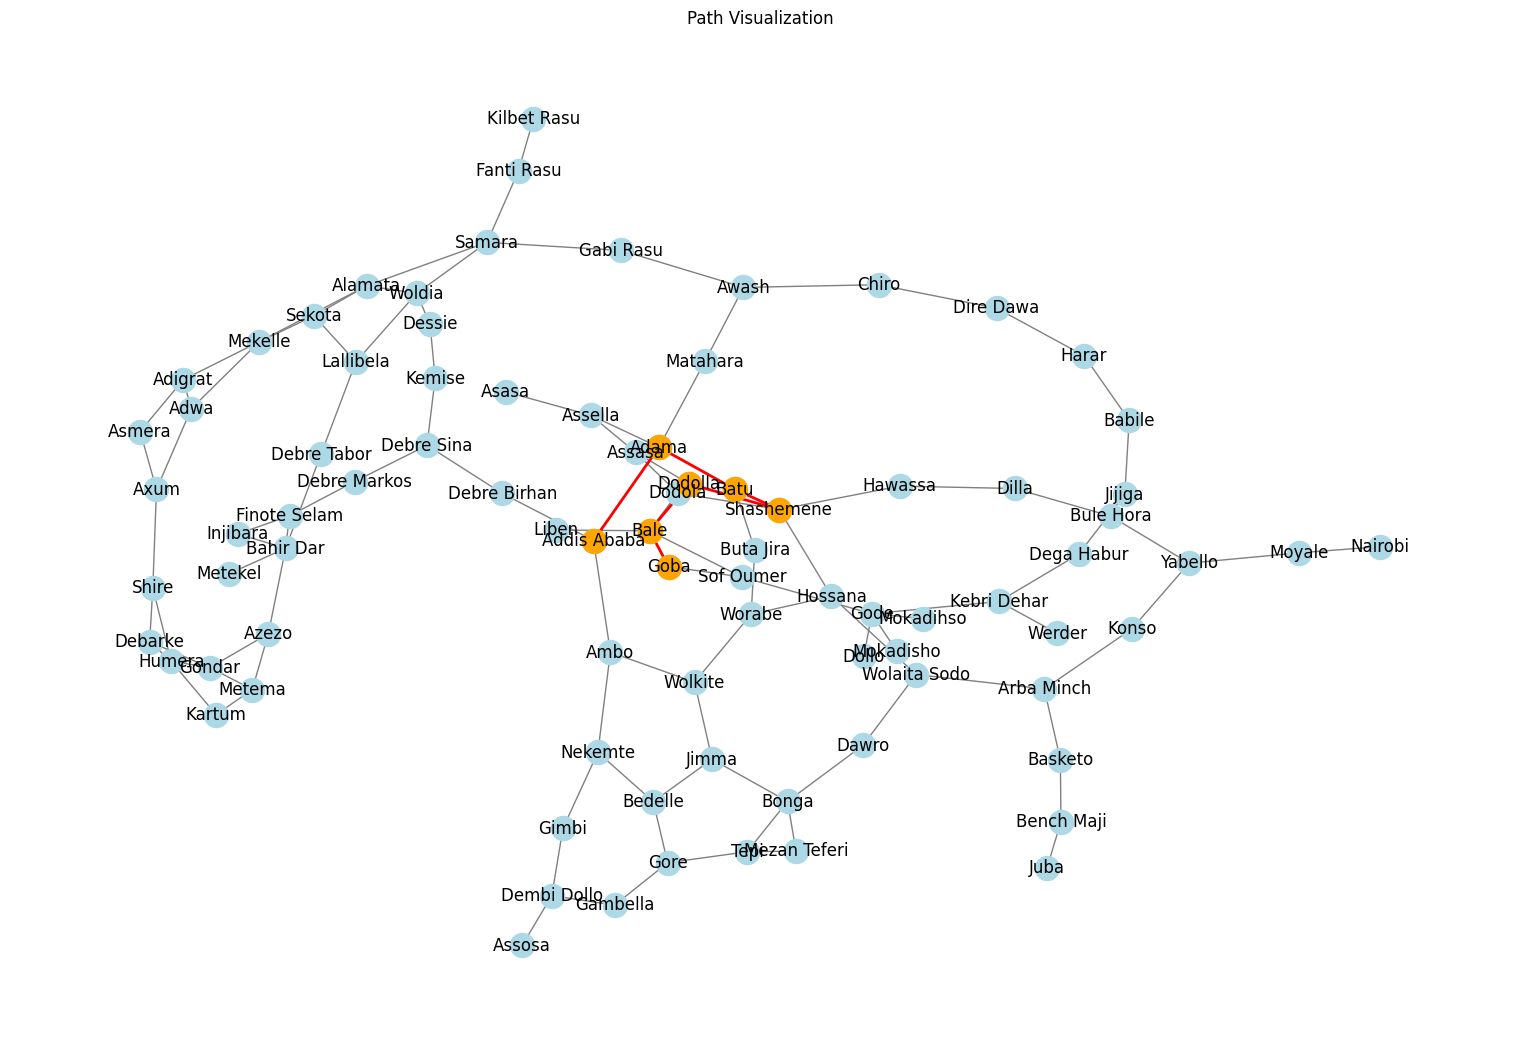

In [93]:
visualize_path(ethiopia_map.graph, bfs_path)

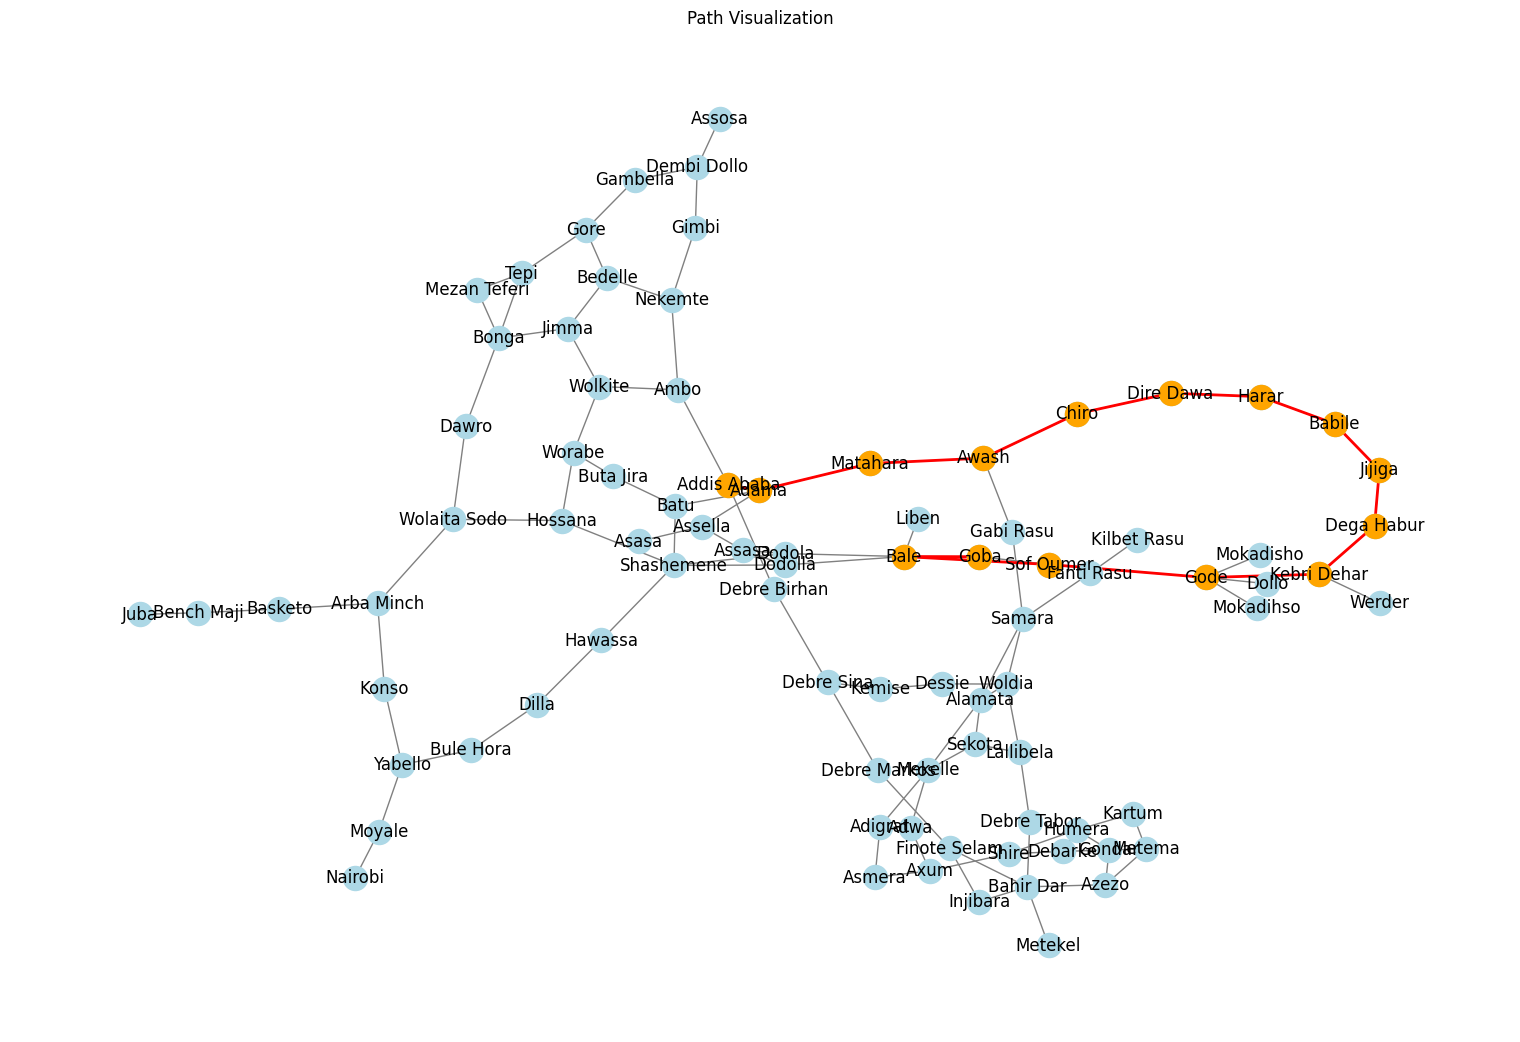

In [94]:
visualize_path(ethiopia_map.graph, dfs_path)

## Question 2: Uniform Cost Search Implementation

In this section, I have:

1. Converted Figure 2 into a manageable data structure.
2. Implemented Uniform Cost Search (UCS) to find the shortest path.
3. Extended UCS to visit multiple goal states optimally.


In [95]:
import heapq
class EthiopiaGraphWithCost:
    def __init__(self):
        self.graph = {
            "Addis Ababa": [("Ambo", 5), ("Adama", 3), ("Debre Birhan", 5)],
            "Ambo": [("Addis Ababa", 5), ("Nekemte", 9), ("Wolkite", 6)],

            "Adama": [("Addis Ababa", 3), ("Batu", 4), ("Assella", 4), ("Matahara", 3)],
            "Debre Birhan": [("Addis Ababa", 5), ("Debre Sina", 2)],
            "Nekemte": [("Ambo", 9), ("Gimbi", 4), ("Bedelle", 0)],

            "Gimbi": [("Nekemte", 4), ("Dembi Dollo", 6)],
            "Dembi Dollo": [("Gimbi", 6), ("Assosa", 12), ("Gambella", 12)],

            "Gore": [("Bedelle", 6), ("Tepi", 9), ("Gambella", 5)],
            "Tepi": [("Gore", 9), ("Mezan Teferi", 4), ("Bonga", 8)],
            "Mezan Teferi": [("Tepi", 4), ("Bonga", 4)],

            "Basketo": [("Bench Maji", 5), ("Arba Minch", 10)],
            "Dawro": [ ("Wolaita Sodo", 6), ("Bonga", 10)],
            "Konso": [("Yabello", 3), ("Arba Minch", 4)],
            "Arba Minch": [("Konso", 4), ("Wolaita Sodo", 0), ("Basketo", 10)],

            "Bonga": [("Mezan Teferi", 5), ("Jimma", 8), ("Dawro", 6), ("Tepi", 10)],
            "Jimma": [("Bonga", 8), ("Wolkite", 6), ("Bedelle", 5)],
            "Wolaita Sodo": [("Hossana", 5), ("Dawro", 7), ("Arba Minch", 10)],
            "Hossana": [("Wolaita Sodo", 5), ("Shashemene", 4), ("Worabe", 6)],
            "Shashemene": [("Hossana", 7), ("Hawassa", 1), ("Dodolla", 3), ("Batu", 3)],
            "Batu": [("Adama", 4), ("Shashemene", 3), ("Buta Jira", 2)],
            "Buta Jira": [("Batu", 2), ("Worabe", 2)],
            "Worabe": [("Buta Jira", 2), ("Hossana", 2), ("Wolkite", 5)],
            "Wolkite": [("Worabe", 5), ("Ambo", 6), ("Jimma", 8)],

            "Assella": [("Adama", 4), ("Asasa", 4)],
            "Hawassa": [("Shashemene", 1), ("Dilla", 3)],
            "Dilla": [("Hawassa", 3), ("Bule Hora", 4)],
            "Bule Hora": [("Dilla", 4), ("Yabello", 3)],
            "Yabello": [("Bule Hora", 3), ("Moyale", 6), ("Konso", 3)],

            "Moyale": [("Yabello", 6), ("Nairobi", 22)],
            "Awash": [("Matahara", 1), ("Chiro", 4), ("Gabi Rasu", 5)],
            "Chiro": [("Awash", 4), ("Dire Dawa", 8)],

            "Dire Dawa": [("Chiro", 8), ("Harar", 4)],
            "Harar": [("Dire Dawa", 4), ("Babile", 2)],
            "Babile": [("Harar", 2), ("Jijiga", 3)],
            "Jijiga": [("Babile", 3), ("Dega Habur", 5)],

            "Dega Habur": [("Jijiga", 5), ("Kebri Dehar", 6)],
            "Kebri Dehar": [("Dega Habur", 6), ("Gode", 5),("Werder", 6)],
            "Gode": [("Kebri Dehar", 5), ("Dollo", 17), ("Mokadisho", 22), ("Sof Oumer", 23)],

            "Dollo": [("Gode", 17)],
            "Liben": [("Bale", 11)],
            "Bale": [("Liben", 11), ("Dodolla", 13), ("Goba", 18), ("Sof Oumer", 23)],
            "Dodolla": [("Bale", 13), ("Shashemene", 3), ("Assasa", 1)],

            "Assasa": [("Dodolla", 1), ("Assella", 4)],
            "Goba": [("Sof Oumer", 6), ("Bale", 18)],
            "Sof Oumer": [("Goba", 6), ("Bale", 23), ("Gode", 23)],

            "Matahara": [("Adama", 3), ("Awash", 1)],
            "Gabi Rasu": [("Awash", 5), ("Samara", 9)],
            "Samara": [("Gabi Rasu", 9), ("Alamata", 11), ("Fanti Rasu", 7), ("Woldia", 8)],

            "Alamata": [("Samara", 11), ("Mekelle", 5), ("Sekota", 6), ("Woldia", 3)],
            "Fanti Rasu": [("Samara", 7), ("Kilbet Rasu", 6)],
            "Kilbet Rasu": [("Fanti Rasu", 6)],

            "Sekota": [("Alamata", 6), ("Mekelle", 9), ("Lallibela", 6)],
            "Mekelle": [("Sekota", 9), ("Alamata", 5), ("Adwa", 7), ("Adigrat", 4)],
            "Adwa": [("Mekelle", 4), ("Axum", 1), ("Adigrat", 4)],
            "Axum": [("Adwa", 1), ("Shire", 2), ("Asmera", 5)],

            "Shire": [("Axum", 2), ("Debarke", 7), ("Humera", 8)],
            "Debarke": [("Shire", 7), ("Gondar", 4), ("Humera", 4)],
            "Gondar": [("Debarke", 4), ("Azezo", 1), ("Metema", 7), ("Humera", 9)],
            "Azezo": [("Gondar", 1), ("Bahir Dar", 7), ("Metema", 7)],
            "Bahir Dar": [("Azezo", 7), ("Debre Tabor", 4), ("Metekel", 11), ("Finote Selam", 6), ("Injibara", 4)],

            "Debre Tabor": [("Bahir Dar", 4), ("Lallibela", 8)],
            "Lallibela": [("Debre Tabor", 8), ("Sekota", 6), ("Woldia", 7)],
            "Finote Selam": [("Bahir Dar", 6), ("Injibara", 2), ("Debre Markos", 3)],
            "Injibara": [("Finote Selam", 2), ("Bahir Dar", 4)],
            "Metema": [("Azezo", 7), ("Gondar", 7), ("Kartum", 19)],

            "Kartum": [("Metema", 19), ("Humera", 21)],
            "Humera": [("Kartum", 21), ("Gondar", 9), ("Shire", 8)],
            "Adigrat": [("Mekelle", 4), ("Adwa", 4), ("Asmera", 6)],
            "Asmera": [("Adigrat", 6), ("Axum", 5)],

            "Werder": [("Kebri Dehar", 6)],
            "Metekel": [("Bahir Dar", 11)],
            "Bench Maji": [("Basketo", 5), ("Juba", 22)],
            "Gambella": [("Dembi Dollo", 4), ("Gore", 5)],

            "Bedelle": [("Nekemte", 0), ("Jimma", 7), ("Gore", 6)],
            "Assosa": [("Dembi Dollo", 12)],
            "Debre Markos": [("Debre Sina", 17), ("Finote Selam", 3)],
            "Woldia": [("Lallibela", 7), ("Alamata", 3), ("Samara", 8), ("Dessie", 6)],

            "Dessie": [("Woldia", 6), ("Kemise", 4)],
            "Kemise": [("Dessie", 6), ("Debre Sina", 6)],
            "Debre Sina": [("Debre Birhan", 2), ("Kemise", 6), ("Debre Markos ", 17)],

            "Mokadihso": [("Gode", 22)],
            "Nairobi": [("Moyale", 22)],
            "Juba": [("Bench Maji", 22)],

        }

    def get_neighbors(self, city):
        return self.graph.get(city, [])


### Uniform Cost Search (UCS)


In [96]:
def uniform_cost_search(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start, [start]))
    visited = set()

    while frontier:
        cost, city, path = heapq.heappop(frontier)
        if city in visited:
            continue
        visited.add(city)
        if city == goal:
            return path, cost
        for neighbor, travel_cost in graph.get_neighbors(city):
            if neighbor not in visited:
                new_cost = cost + travel_cost
                heapq.heappush(frontier, (new_cost, neighbor, path + [neighbor]))

    return None, float('inf')

### Running UCS

Let's find the optimal path from "Addis Ababa" to "Tepi" using UCS.


In [97]:
ethiopia_map2 = EthiopiaGraphWithCost()
path, cost = uniform_cost_search(ethiopia_map2, "Addis Ababa", "Lallibela")

print("Optimal Path:", path)
print("Total Cost:", cost)


Optimal Path: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Lallibela']
Total Cost: 32


### Customized UCS for Multiple Goal States

We will now extend the UCS implementation to visit multiple goal states optimally.


In [98]:
def uniform_cost_search_multi(graph, start, goals):
    state_city = []
    heapq.heappush(state_city, (0, start, [start]))
    visited = set()
    visited_goals = set()

    while state_city and len(visited_goals) < len(goals):
        cost, city, path = heapq.heappop(state_city)

        if city in visited:
            continue
        visited.add(city)
        if city in goals and city not in visited_goals:
            visited_goals.add(city)
            print(f"Goal Reached: {city}, Total Cost Was: {cost}, Path Is: {path}")
        # print(city, "hhh", graph.get_neighbors(city))
        for neighbor, travel_cost in graph.get_neighbors(city):
            if neighbor not in visited:
                new_cost = cost + travel_cost
                heapq.heappush(state_city, (new_cost, neighbor, path + [neighbor]))
    return visited_goals


### Running Customized UCS

Let's visit multiple goal states from "Addis Ababa".


In [99]:
goal_cities = ["Axum", "Gondar", "Lallibela", "Babile", "Jimma", "Bale", "Sof Oumer", "Arba Minch"]
visited_goals = uniform_cost_search_multi(ethiopia_map2, "Addis Ababa", goal_cities)


Goal Reached: Jimma, Total Cost Was: 19, Path Is: ['Addis Ababa', 'Ambo', 'Wolkite', 'Jimma']
Goal Reached: Babile, Total Cost Was: 25, Path Is: ['Addis Ababa', 'Adama', 'Matahara', 'Awash', 'Chiro', 'Dire Dawa', 'Harar', 'Babile']
Goal Reached: Bale, Total Cost Was: 26, Path Is: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Dodolla', 'Bale']
Goal Reached: Arba Minch, Total Cost Was: 28, Path Is: ['Addis Ababa', 'Adama', 'Batu', 'Buta Jira', 'Worabe', 'Hossana', 'Wolaita Sodo', 'Arba Minch']
Goal Reached: Lallibela, Total Cost Was: 32, Path Is: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Lallibela']
Goal Reached: Axum, Total Cost Was: 41, Path Is: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Alamata', 'Mekelle', 'Adwa', 'Axum']
Goal Reached: Sof Oumer, Total Cost Was: 49, Path Is: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Dodolla', 'Bale', 'Sof Oumer']
Goal Reached: Gondar, Total Cost Was: 52, Path Is: ['Addis Aba

## Question 3: A* Search Algorithm Implementation

In this section, I have:

1. Converted Figure 3 (state space graph with heuristic and backward costs) into a manageable data structure.
2. Implemented the A* search algorithm to find the optimal path from **Addis Ababa** to **Moyale**.


In [100]:
class EthiopiaGraphHeuristics:
    def __init__(self):
        self.graph = {
            "Addis Ababa": [("Ambo", 5), ("Adama", 3), ("Debre Birhan", 5)],
            "Ambo": [("Addis Ababa", 5), ("Nekemte", 9), ("Wolkite", 6)],

            "Adama": [("Addis Ababa", 3), ("Batu", 4), ("Assella", 4), ("Matahara", 3)],
            "Debre Birhan": [("Addis Ababa", 5), ("Debre Sina", 2)],
            "Nekemte": [("Ambo", 9), ("Gimbi", 4), ("Bedelle", 0)],

            "Gimbi": [("Nekemte", 4), ("Dembi Dollo", 6)],
            "Dembi Dollo": [("Gimbi", 6), ("Assosa", 12), ("Gambella", 12)],

            "Gore": [("Bedelle", 6), ("Tepi", 9), ("Gambella", 5)],
            "Tepi": [("Gore", 9), ("Mezan Teferi", 4), ("Bonga", 8)],
            "Mezan Teferi": [("Tepi", 4), ("Bonga", 4)],

            "Basketo": [("Bench Maji", 5), ("Arba Minch", 10)],
            "Dawro": [ ("Wolaita Sodo", 6), ("Bonga", 10)],
            "Konso": [("Yabello", 3), ("Arba Minch", 4)],
            "Arba Minch": [("Konso", 4), ("Wolaita Sodo", 0), ("Basketo", 10)],

            "Bonga": [("Mezan Teferi", 5), ("Jimma", 8), ("Dawro", 6), ("Tepi", 10)],
            "Jimma": [("Bonga", 8), ("Wolkite", 6), ("Bedelle", 5)],
            "Wolaita Sodo": [("Hossana", 5), ("Dawro", 7), ("Arba Minch", 10)],
            "Hossana": [("Wolaita Sodo", 5), ("Shashemene", 4), ("Worabe", 6)],
            "Shashemene": [("Hossana", 7), ("Hawassa", 1), ("Dodolla", 3), ("Batu", 3)],
            "Batu": [("Adama", 4), ("Shashemene", 3), ("Buta Jira", 2)],
            "Buta Jira": [("Batu", 2), ("Worabe", 2)],
            "Worabe": [("Buta Jira", 2), ("Hossana", 2), ("Wolkite", 5)],
            "Wolkite": [("Worabe", 5), ("Ambo", 6), ("Jimma", 8)],

            "Assella": [("Adama", 4), ("Asasa", 4)],
            "Hawassa": [("Shashemene", 1), ("Dilla", 3)],
            "Dilla": [("Hawassa", 3), ("Bule Hora", 4)],
            "Bule Hora": [("Dilla", 4), ("Yabello", 3)],
            "Yabello": [("Bule Hora", 3), ("Moyale", 6), ("Konso", 3)],

            "Moyale": [("Yabello", 6), ("Nairobi", 22)],
            "Awash": [("Matahara", 1), ("Chiro", 4), ("Gabi Rasu", 5)],
            "Chiro": [("Awash", 4), ("Dire Dawa", 8)],

            "Dire Dawa": [("Chiro", 8), ("Harar", 4)],
            "Harar": [("Dire Dawa", 4), ("Babile", 2)],
            "Babile": [("Harar", 2), ("Jijiga", 3)],
            "Jijiga": [("Babile", 3), ("Dega Habur", 5)],

            "Dega Habur": [("Jijiga", 5), ("Kebri Dehar", 6)],
            "Kebri Dehar": [("Dega Habur", 6), ("Gode", 5),("Werder", 6)],
            "Gode": [("Kebri Dehar", 5), ("Dollo", 17), ("Mokadisho", 22), ("Sof Oumer", 23)],

            "Dollo": [("Gode", 17)],
            "Liben": [("Robe", 11)],
            "Robe": [("Liben", 11), ("Dodolla", 13), ("Goba", 18), ("Sof Oumer", 23)],
            "Dodolla": [("Bale", 13), ("Shashemene", 3), ("Assasa", 1)],

            "Assasa": [("Dodolla", 1), ("Assella", 4)],
            "Goba": [("Sof Oumer", 6), ("Bale", 18)],
            "Sof Oumer": [("Goba", 6), ("Bale", 23), ("Gode", 23)],

            "Matahara": [("Adama", 3), ("Awash", 1)],
            "Gabi Rasu": [("Awash", 5), ("Samara", 9)],
            "Samara": [("Gabi Rasu", 9), ("Alamata", 11), ("Fanti Rasu", 7), ("Woldia", 8)],

            "Alamata": [("Samara", 11), ("Mekelle", 5), ("Sekota", 6), ("Woldia", 3)],
            "Fanti Rasu": [("Samara", 7), ("Kilbet Rasu", 6)],
            "Kilbet Rasu": [("Fanti Rasu", 6)],

            "Sekota": [("Alamata", 6), ("Mekelle", 9), ("Lallibela", 6)],
            "Mekelle": [("Sekota", 9), ("Alamata", 5), ("Adwa", 7), ("Adigrat", 4)],
            "Adwa": [("Mekelle", 4), ("Axum", 1), ("Adigrat", 4)],
            "Axum": [("Adwa", 1), ("Shire", 2), ("Asmera", 5)],

            "Shire": [("Axum", 2), ("Debarke", 7), ("Humera", 8)],
            "Debarke": [("Shire", 7), ("Gondar", 4), ("Humera", 4)],
            "Gondar": [("Debarke", 4), ("Azezo", 1), ("Metema", 7), ("Humera", 9)],
            "Azezo": [("Gondar", 1), ("Bahir Dar", 7), ("Metema", 7)],
            "Bahir Dar": [("Azezo", 7), ("Debre Tabor", 4), ("Metekel", 11), ("Finote Selam", 6), ("Injibara", 4)],

            "Debre Tabor": [("Bahir Dar", 4), ("Lallibela", 8)],
            "Lallibela": [("Debre Tabor", 8), ("Sekota", 6), ("Woldia", 7)],
            "Finote Selam": [("Bahir Dar", 6), ("Injibara", 2), ("Debre Markos", 3)],
            "Injibara": [("Finote Selam", 2), ("Bahir Dar", 4)],
            "Metema": [("Azezo", 7), ("Gondar", 7), ("Kartum", 19)],

            "Kartum": [("Metema", 19), ("Humera", 21)],
            "Humera": [("Kartum", 21), ("Gondar", 9), ("Shire", 8)],
            "Adigrat": [("Mekelle", 4), ("Adwa", 4), ("Asmera", 6)],
            "Asmera": [("Adigrat", 6), ("Axum", 5)],

            "Werder": [("Kebri Dehar", 6)],
            "Metekel": [("Bahir Dar", 11)],
            "Bench Maji": [("Basketo", 5), ("Juba", 22)],
            "Gambella": [("Dembi Dollo", 4), ("Gore", 5)],

            "Bedelle": [("Nekemte", 0), ("Jimma", 7), ("Gore", 6)],
            "Assosa": [("Dembi Dollo", 12)],
            "Debre Markos": [("Debre Sina", 17), ("Finote Selam", 3)],
            "Woldia": [("Lallibela", 7), ("Alamata", 3), ("Samara", 8), ("Dessie", 6)],

            "Dessie": [("Woldia", 6), ("Kemise", 4)],
            "Kemise": [("Dessie", 6), ("Debre Sina", 6)],
            "Debre Sina": [("Debre Birhan", 2), ("Kemise", 6), ("Debre Markos ", 17)],

            "Mokadihso": [("Gode", 22)],
            "Nairobi": [("Moyale", 22)],
            "Juba": [("Bench Maji", 22)],

        }

        self.heuristics = {

            "Addis Ababa":26,
            "Ambo":31,
            "Adama":23,
            "Debre Birhan":31,
            "Nekemte":39,

            "Gimbi":43,
            "Dembi Dollo":49,
            "Gore":46,
            "Tepi":41,
            "Mezan Teferi":37,

            "Basketo":23,
            "Dawro":23,
            "Konso":9,
            "Arba Minch":13,
            "Bonga":33,

            "Jimma":33,
            "Wolaita Sodo":17,
            "Hossana":21,
            "Shashemene":16,
            "Batu":19,

            "Buta Jira":21,
            "Worabe":22,
            "Wolkite":25,
            "Assella":22,
            "Hawassa":15,

            "Dilla":12,
            "Bule Hora":8,
            "Yabello":6,
            "Moyale":0,
            "Awash":27,

            "Chiro":31,
            "Dire Dawa":31,
            "Harar":35,
            "Babile":37,
            "Jijiga":40,

            "Dega Habur":45,
            "Kebri Dehar":40,
            "Gode":35,
            "Dollo":18,
            "Liben":11,

            "Robe":22,
            "Dodolla":19,
            "Assasa":18,
            "Goba":40,
            "Sof Oumer":45,

            "Matahara":26,
            "Gabi Rasu":32,
            "Samara":42,
            "Alamata":53,
            "Fanti Rasu":49,

            "Kilbet Rasu":55,
            "Sekota":59,
            "Mekelle":58,
            "Adwa":65,
            "Axum":66,

            "Shire":67,
            "Debarke":60,
            "Gondar":56,
            "Azezo":55,
            "Bahir Dar":48,

            "Debre Tabor":52,
            "Lallibela":57,
            "Finote Selam":42,
            "Injibara":44,
            "Metema":62,

            "Kartum":81,
            "Humera":65,
            "Adigrat":62,
            "Asmera":68,
            "Werder":46,

            "Metekel":59,
            "Bench Maji":28,
            "Gambella":51,
            "Bedelle":40,
            "Assosa":51,

            "Debre Markos":39,
            "Woldia":50,
            "Dessie":44,
            "Kemise":40,
            "Debre Sina":33,

            "Mokadihso":40,
            "Nairobi":22,
            "Juba":50
        }

    def get_neighbors(self, city):
        return self.graph.get(city, [])


    def get_heuristic(self, city):
        return self.heuristics.get(city, float('inf'))


## A* Search Algorithm Implementation

The A* search algorithm considers both:

- **`g(n)`** → The actual cost from the start node to the current node.
- **`h(n)`** → The heuristic (estimated) cost from the current node to the goal.


In [101]:
def a_star_search(graph, heuristics, start, goal):
    State_city = []
    heapq.heappush(State_city, (0 + heuristics[start], 0, start, [start]))
    visited = set()

    while State_city:
        f, g, current, path = heapq.heappop(State_city)
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path, g

        for neighbor, cost in graph.get_neighbors(current):
            if neighbor not in visited:
                new_g = g + cost
                f = new_g + heuristics[neighbor]
                heapq.heappush(State_city, (f, new_g, neighbor, path + [neighbor]))
    return None, float('inf')

### Running A* Search Algorithm

Let's find the optimal path from **Addis Ababa** to **Moyale**.


In [102]:
ethiopia_map3 = EthiopiaGraphHeuristics()
a_star_path, cost = a_star_search(ethiopia_map3, ethiopia_map3.heuristics, "Addis Ababa", "Moyale")

print("Optimal Path:", a_star_path)
print("Total Cost:", cost)


Optimal Path: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Hawassa', 'Dilla', 'Bule Hora', 'Yabello', 'Moyale']
Total Cost: 27


## Question 4: MiniMax Search Algorithm Implementation

In this section, I have:

1. Converted Figure 4 (state space graph with an adversary) into a manageable data structure.
2. Implemented the MiniMax search algorithm to find the best coffee quality.


In [103]:
class EthiopiaAdversaryGraph:
    def __init__(self):
        self.graph = {
            "Addis Ababa": ["Ambo", "Adama", "Buta Jirra"],
            "Buta Jirra":["Addis Ababa", "Worabe", "Wolkite"],
            "Ambo": ["Addis Ababa", "Gedo", "Nekemte"],
            "Adama": ["Addis Ababa", "Mojo", "Dire Dawa"],
            "Gedo": ["Ambo", "Shambu", "Fincha"],
            "Nekemte": ["Ambo", "Gimbi", "Limu"],
            "Mojo": ["Adama", "Dilla", "Kaffa"],
            "Dire Dawa": ["Adama", "Chiro", "Harar"],
            "Shambu": ["Gedo"],
            "Fincha": ["Gedo"],
            "Gimbi": ["Nekemte"],
            "Limu": ["Nekemte"],
            "Wolkite": ["Buta Jira", "Bench Naji", "Tepi"],
            "Chiro": ["Dire Dawa"],
            "Harar": ["Dire Dawa"],
            "Worabe": ["Buta Jira", "Hossana", "Durame"],
            "Hossana": ["Worabe"],
            "Durame": ["Worabe"],
            "Bench Maji": ["Wolkite"],
            "Tepi": ["Wolkite"],
            "Dilla": ["Mojo"],
            "Kaffa": ["Mojo"]
        }

        self.utilities = {

          "Addis Ababa":0,
          "Ambo":0,

          "Adama":0,
          "Buta Jirra":0,
          "Mojo":0,
          "Dire Dawa":0,

          "Wolkite":0,
          "Worabe":0,
          "Nekemte":0,
          "Gedo":0,

          "Shambu":4,
          "Fincha":5,
          "Gimbi":8,
          "Limu":8,

          "Chiro":6,
          "Harar":10,
          "Hossana":6,
          "Durame":5,

          "Bench Naji":5,
          "Tepi":6,
          "Dilla":9,
          "Kaffa":7
        }

    def get_neighbors(self, city):
        return self.graph.get(city, [])

    def get_utility(self, city):
        return self.utilities.get(city, 0)

## Implementing the MiniMax Algorithm

The MiniMax algorithm considers the following:

- The **agent** tries to **maximize** coffee quality (maximizer).
- The **adversary** tries to **minimize** coffee quality (minimizer).


In [104]:
def minimax(graph, city, depth, maximizing_player):
    if not graph.get_neighbors(city) or depth == 0:
        return graph.get_utility(city)

    if maximizing_player:
        max_eval = float('-inf')
        for neighbor in graph.get_neighbors(city):
            eval = minimax(graph, neighbor, depth - 1, False)
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for neighbor in graph.get_neighbors(city):
            eval = minimax(graph, neighbor, depth - 1, True)
            min_eval = min(min_eval, eval)
        return min_eval

## Finding the Best Path Using MiniMax


In [105]:
def find_best_path(graph, start, depth):
    best_val = float('-inf')
    best_move = None

    for neighbor in graph.get_neighbors(start):
        move_val = minimax(graph, neighbor, depth - 1, False)

        if move_val > best_val:
            best_val = move_val
            best_move = neighbor

    return best_move, best_val

## Running the MiniMax Search

The best possible path from **Addis Ababa** with depth of 15.


In [106]:
ethiopia_adversary_map = EthiopiaAdversaryGraph()
best_city, best_val = find_best_path(ethiopia_adversary_map, "Addis Ababa", 15)

print("Best city to move to:", best_city)
print("Expected coffee quality:", best_val)

Best city to move to: Ambo
Expected coffee quality: 0
